In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from data.scm import SCM
from data.variable import Variable, EXOGENOUS_TYPE, ENDOGENOUS_TYPE
from data.generator import SimpleDataGenerator

sns.set(style = 'whitegrid')

## Fork Structure

In [2]:
W = Variable('W', EXOGENOUS_TYPE)
T = Variable('T', ENDOGENOUS_TYPE)
Y = Variable('Y', ENDOGENOUS_TYPE)


fork_scm = SCM()


fork_scm.add_equation(W, {})
fork_scm.add_equation(outcome_variable=T, input_variables={W: 0.5})
fork_scm.add_equation(outcome_variable=Y, input_variables={W: 0.4, T: 0.3})

fork_data = SimpleDataGenerator().generate(fork_scm, 1000, 777)
x_points = np.linspace(fork_data['T'].min(), fork_data['T'].max(), 1000)

In [3]:
fork_data

,W,T,Y
0,-0.468209,-0.886550,-0.862168
1,-0.822825,-1.093220,-0.020935
2,-0.065380,0.376598,-0.869703
3,-0.713362,0.496613,-2.509295
4,0.906351,0.868822,-0.228657
...,...,...,...
995,-0.378325,-1.479165,-0.064225
996,0.911096,-0.374436,-0.153786
997,-1.503771,-0.206276,-1.226089
998,-0.108478,0.443006,-0.284806


In [4]:
result_unudjusted = sm.OLS(fork_data['Y'], fork_data[['T']]).fit()
result_unudjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.172
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              208.0
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                    5.56e-43
Time:                        04:05:05   Log-Likelihood:                         -1466.2
No. Observations:                1000   AIC:                                      2934.
Df Residuals:                     999   BIC:                                      2939.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T              0.4234      0.029     14.424      0.000       0.366       0.481
==============================================================================
Omnibus:                        2.436   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.507
Skew:                           0.110   Prob(JB):                        0.286
Kurtosis:                       2.890   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
result_adjusted = sm.OLS(fork_data['Y'], fork_data[['W','T']]).fit()
result_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.242
Model:                            OLS   Adj. R-squared (uncentered):              0.240
Method:                 Least Squares   F-statistic:                              159.3
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                    8.93e-61
Time:                        04:05:05   Log-Likelihood:                         -1422.2
No. Observations:                1000   AIC:                                      2848.
Df Residuals:                     998   BIC:                                      2858.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W              0.3323      0.035      9.577      0.000       0.264       0.400
T              0.3019      0.031      9.794      0.000       0.241       0.362
==============================================================================
Omnibus:                        1.664   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.601
Skew:                           0.097   Prob(JB):                        0.449
Kurtosis:                       3.024   Cond. No.                         1.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

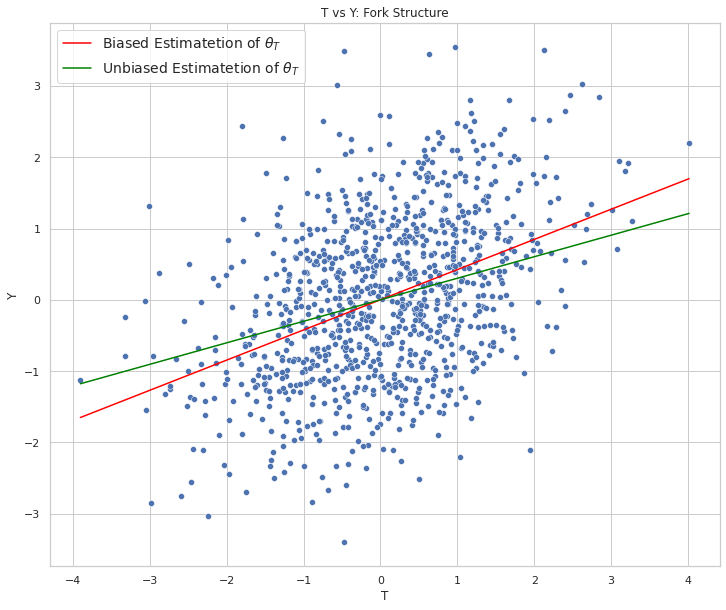

In [6]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='T', y='Y', data=fork_data).set_title("T vs Y: Fork Structure");

sns.lineplot(x=x_points, y= result_unudjusted.params['T']*x_points, color='red', label=r'Biased Estimatetion of $\theta_{T}$')
sns.lineplot(x=x_points, y= result_adjusted.params['T']*x_points, color='green', label=r'Unbiased Estimatetion of $\theta_{T}$')
plt.legend(prop={'size': 14});

## Collider Structure

In [7]:
W = Variable('W', ENDOGENOUS_TYPE)
T = Variable('T', ENDOGENOUS_TYPE)
Y = Variable('Y', ENDOGENOUS_TYPE)


collider_scm = SCM()


collider_scm.add_equation(T, {})
collider_scm.add_equation(outcome_variable=Y, input_variables={T: -1.2})
collider_scm.add_equation(outcome_variable=W, input_variables={T: 1.0, Y: 1.0})


collider_data= SimpleDataGenerator().generate(collider_scm, 1000, 777)
x_points = np.linspace(collider_data['T'].min(), collider_data['T'].max(), 1000)

In [8]:
result_adjusted = sm.OLS(collider_data['Y'], collider_data[['W', 'T']]).fit()
result_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              2021.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                        0.00
Time:                        04:05:05   Log-Likelihood:                         -1087.7
No. Observations:                1000   AIC:                                      2179.
Df Residuals:                     998   BIC:                                      2189.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W              0.5132      0.016     32.499      0.000       0.482       0.544
T             -1.0812      0.023    -46.723      0.000      -1.127      -1.036
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.535
Skew:                          -0.122   Prob(JB):                        0.281
Kurtosis:                       2.968   Cond. No.                         1.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
result_unadjusted = sm.OLS(collider_data['Y'], collider_data[['T']]).fit()
result_unadjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              1453.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                   5.87e-197
Time:                        04:05:05   Log-Likelihood:                         -1448.6
No. Observations:                1000   AIC:                                      2899.
Df Residuals:                     999   BIC:                                      2904.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T             -1.2372      0.032    -38.113      0.000      -1.301      -1.173
==============================================================================
Omnibus:                        4.505   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                5.227
Skew:                          -0.050   Prob(JB):                       0.0733
Kurtosis:                       3.340   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

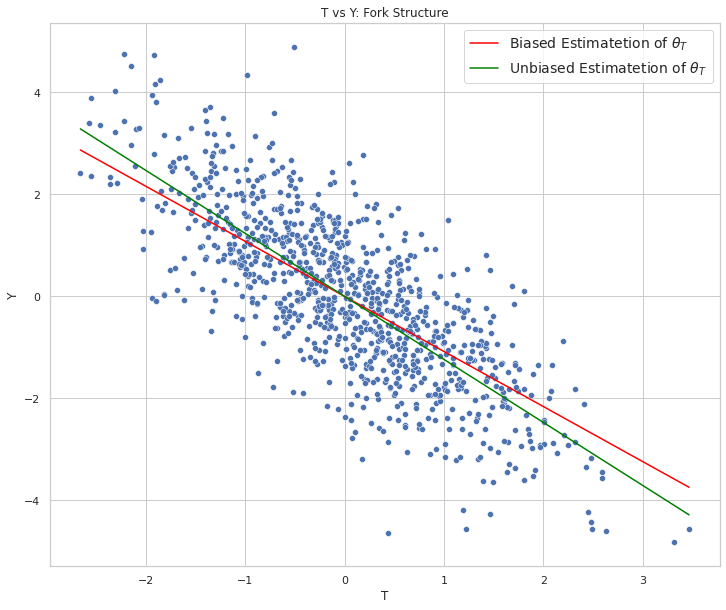

In [10]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='T', y='Y', data=collider_data).set_title("T vs Y: Fork Structure");

sns.lineplot(x=x_points, y= result_adjusted.params['T']*x_points, color='red', label=r'Biased Estimatetion of $\theta_{T}$')
sns.lineplot(x=x_points, y= result_unadjusted.params['T']*x_points, color='green', label=r'Unbiased Estimatetion of $\theta_{T}$')
plt.legend(prop={'size': 14});

### Use-case

In [11]:
W = Variable('W', EXOGENOUS_TYPE, config={'mean': 65, 'std': 5}) # Age
T = Variable('T', ENDOGENOUS_TYPE)
Y = Variable('Y', ENDOGENOUS_TYPE)
Z = Variable('Z' , ENDOGENOUS_TYPE)


use_case_scm = SCM()


use_case_scm.add_equation(W, {})
use_case_scm.add_equation(outcome_variable=T, input_variables={W: 0.056})
use_case_scm.add_equation(outcome_variable=Y, input_variables={T: 1.05, W: 2.0})
use_case_scm.add_equation(outcome_variable=Z, input_variables={Y: 2.0, T: 2.8})


use_case_data= SimpleDataGenerator().generate(use_case_scm, 1000, 777)


x_points = np.linspace(use_case_data['T'].min(), use_case_data['T'].max(), 1000)

use_case_data.head(10)

,W,T,Y,Z
0,62.658956,2.856455,127.908271,263.654727
1,60.885876,2.727801,125.272104,258.464300
2,64.673099,4.030981,132.622200,275.256962
3,61.433190,4.293552,125.001676,262.198249
4,69.531754,4.309425,142.736561,298.259713
5,68.831184,3.096650,141.199629,291.091303
6,69.130270,4.298025,142.993389,297.929110
7,58.381586,4.484057,121.618242,255.962889
8,56.237777,1.566512,113.000006,230.619824
9,70.012245,3.338597,143.534454,296.889513


In [12]:
def calculate_ATE(data, treatment_variable, outcome_variable, variable_to_adjust):
    variables = [treatment_variable]+variable_to_adjust
    

    X = data[variables]
    X = sm.add_constant(X)
    treated_model_coefficient = sm.OLS(data[outcome_variable], X).fit().summary()
           
    print(treated_model_coefficient)     

In [13]:
calculate_ATE(use_case_data, 'T', 'Y', [])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           9.05e-27
Time:                        04:05:06   Log-Likelihood:                -3696.4
No. Observations:                1000   AIC:                             7397.
Df Residuals:                     998   BIC:                             7407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.4095      1.111    110.184      0.0

In [14]:
calculate_ATE(use_case_data, 'T', 'Y', ['W', 'Z'])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.866e+05
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:05:06   Log-Likelihood:                -587.21
No. Observations:                1000   AIC:                             1182.
Df Residuals:                     996   BIC:                             1202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136      0.180      1.186      0.2

In [15]:
calculate_ATE(use_case_data, 'T', 'Y', ['W'])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.236e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:05:06   Log-Likelihood:                -1422.1
No. Observations:                1000   AIC:                             2850.
Df Residuals:                     997   BIC:                             2865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8931      0.414      2.157      0.0